## Plot Results of Solving Ising Model using Density Matrix Renormalizaton Group

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import subprocess

In [2]:
def mean_field_energy_density(lmbda):
    if np.abs(lmbda) <= 2:
        return -1 - lmbda ** 2 / 4
    return -np.abs(lmbda)

In [3]:
compiled_dir = f"..{os.sep}compiled"
data_dir = f"..{os.sep}data"
plot_dir = f"..{os.sep}plots"

In [4]:
program = f"{compiled_dir}{os.sep}dmrg_ising"

In [5]:
N = list(range(1, 2))

In [6]:
lam = np.arange(-5, 5.1, 0.1)

In [7]:
gs_energy = np.zeros((len(N), len(lam)))
gs_energy[:] = np.nan

In [8]:
max_iterations = np.zeros((len(N), len(lam)))
max_iterations[:] = np.nan

In [9]:
for i in range(len(N)):
    print(f"Running N = {N[i]} ...")
    for j in range(len(lam)):
        output = subprocess.run(
            [program, "--N", str(N[i]), "--lambda", str(lam[j]), "--max_iter", str(500), "--thres", str(0.0005)],
            stdout=subprocess.PIPE,
            encoding="ascii"
        )

        results = output.stdout.split("\n")

        did_converge = results[8].split("=")[1].strip()

        #if did_converge == "T":
        gs_energy[i, j] = float(results[6].split("=")[1])
        max_iterations[i, j] = int(results[7].split("=")[1])

Running N = 1 ...


In [10]:
max_iterations[0]

array([100.,  99.,  98.,  97.,  96.,  95.,  94.,  93.,  92.,  91.,  90.,
        88.,  87.,  86.,  85.,  84.,  83.,  82.,  80.,  79.,  78.,  77.,
        76.,  74.,  73.,  72.,  71.,  69.,  68.,  67.,  65.,  64.,  63.,
        61.,  60.,  59.,  58.,  56.,  56.,  55.,  58.,  66.,  60.,  58.,
        57.,  56.,  55.,  54.,  55.,  54.,  69.,  54.,  54.,  54.,  55.,
        56.,  57.,  58.,  60.,  66.,  58.,  55.,  56.,  56.,  58.,  59.,
        60.,  61.,  63.,  64.,  65.,  67.,  68.,  69.,  71.,  72.,  73.,
        74.,  76.,  77.,  78.,  79.,  80.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [11]:
gs_energy[0]

array([-5.0005, -4.902 , -4.8036, -4.7052, -4.6069, -4.5086, -4.4105,
       -4.3123, -4.2143, -4.1164, -4.0185, -3.9202, -3.8226, -3.725 ,
       -3.6275, -3.5302, -3.433 , -3.336 , -3.2386, -3.1419, -3.0454,
       -2.9492, -2.8531, -2.7569, -2.6614, -2.5662, -2.4715, -2.3767,
       -2.2829, -2.1896, -2.0965, -2.0047, -1.9139, -1.8237, -1.7354,
       -1.6489, -1.5647, -1.4831, -1.4071, -1.338 , -1.2866, -1.2614,
       -1.2042, -1.1517, -1.1054, -1.0654, -1.0323, -1.0063, -0.9781,
       -0.9769, -0.9653, -0.9769, -0.9879, -1.0063, -1.0323, -1.0654,
       -1.1054, -1.1517, -1.2042, -1.2614, -1.2866, -1.338 , -1.4071,
       -1.4831, -1.5647, -1.6489, -1.7354, -1.8237, -1.9139, -2.0047,
       -2.0965, -2.1896, -2.2829, -2.3767, -2.4715, -2.5662, -2.6614,
       -2.7569, -2.8531, -2.9492, -3.0454, -3.1419, -3.2386, -3.336 ,
       -3.433 , -3.5302, -3.6275, -3.725 , -3.8226, -3.9202, -4.0185,
       -4.1164, -4.2143, -4.3123, -4.4105, -4.5086, -4.6069, -4.7052,
       -4.8036, -4.9

In [12]:
mf_gs_energy = [mean_field_energy_density(l) for l in lam]

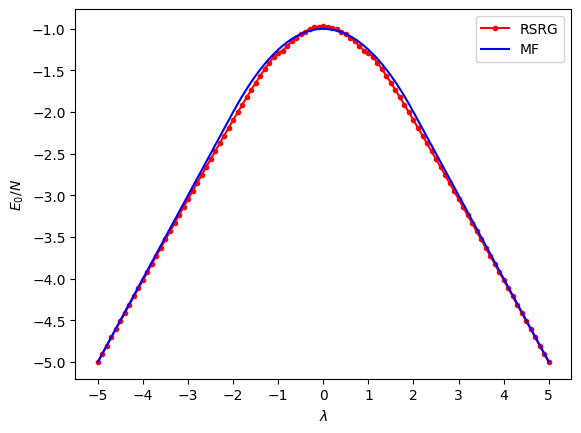

In [13]:
plt.plot(lam, gs_energy[0], "r.-", label="RSRG")
plt.plot(lam, mf_gs_energy, "b-", label="MF")
plt.xlabel("$\lambda$")
plt.ylabel("$E_0/N$")
plt.xticks(np.arange(-5, 6, 1))
plt.legend()
plt.savefig(f"{plot_dir}{os.sep}energy_vs_lambda_dmrg.pdf", format="pdf", bbox_inches="tight")